In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sp500_stocks = pd.read_csv('sp500_stocks.csv')

# First five rows of each DataFrame
print(sp500_stocks.head())

# finding and filling missing values
print(sp500_stocks.isnull().sum())


         Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  53.295406  83.019997  83.449997  82.669998  83.089996   
1  2010-01-05    MMM  52.961571  82.500000  83.230003  81.699997  82.800003   
2  2010-01-06    MMM  53.712673  83.669998  84.599998  83.510002  83.879997   
3  2010-01-07    MMM  53.751186  83.730003  83.760002  82.120003  83.320000   
4  2010-01-08    MMM  54.129955  84.320000  84.320000  83.300003  83.690002   

      Volume  
0  3043700.0  
1  2847000.0  
2  5268500.0  
3  4470100.0  
4  3405800.0  
Date             0
Symbol           0
Adj Close    79913
Close        79913
High         79913
Low          79913
Open         79913
Volume       79913
dtype: int64


In [3]:
sp500_stocks.fillna(method='ffill', inplace=True)
sp500_stocks.fillna(method='bfill', inplace=True)
# make the Close column data be float
sp500_stocks['Close'] = sp500_stocks['Close'].astype(float)

C:\Users\boyea\AppData\Local\Temp\ipykernel_27584\2605451886.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_stocks.fillna(method='ffill', inplace=True)
C:\Users\boyea\AppData\Local\Temp\ipykernel_27584\2605451886.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_stocks.fillna(method='bfill', inplace=True)


In [4]:
print(sp500_stocks.isnull().sum())

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [5]:
list_of_stocks = sp500_stocks['Symbol'].unique()
print("Total unique stock: ", len(list_of_stocks))

Total unique stock:  503


**STOCK PRICES OF THE TOP 10 COMPANIES BY MARKET CAP**

['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'GOOG', 'META', 'BRK-B', 'LLY', 'TSLA']
[3029538963456, 2801469489152, 1941575041024, 1798682181632, 1702349766656, 1700641112064, 1233965416448, 892769468416, 719882223616, 643454926848]
['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'GOOG', 'META', 'BRK-B', 'LLY', 'TSLA']


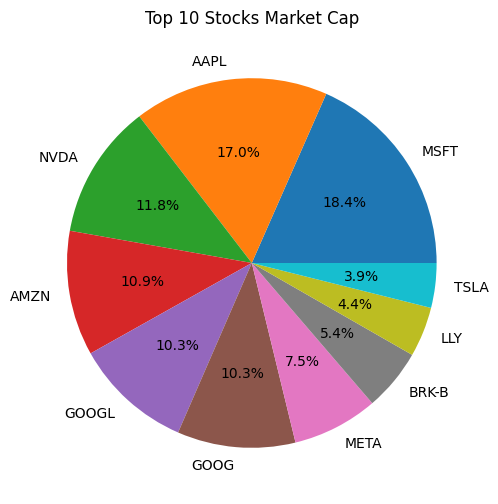

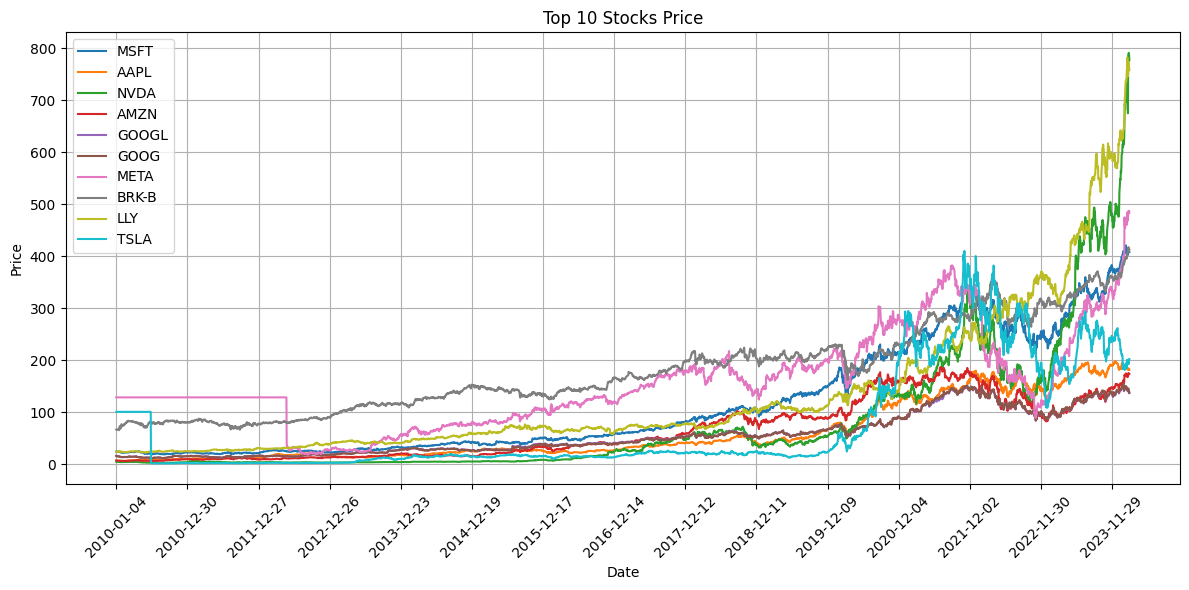

['Software - Infrastructure', 'Consumer Electronics', 'Semiconductors', 'Internet Retail', 'Internet Content & Information', 'Internet Content & Information', 'Internet Content & Information', 'Insurance - Diversified', 'Drug Manufacturers - General', 'Auto Manufacturers']
[3029538963456, 2801469489152, 1941575041024, 1798682181632, 1702349766656, 1700641112064, 1233965416448, 892769468416, 719882223616, 643454926848]


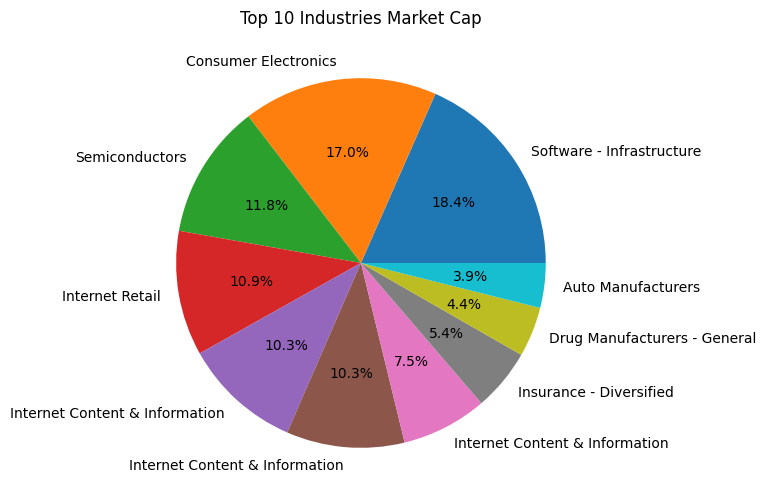

In [29]:
stock_comp = pd.read_csv('sp500_companies.csv')
# a list of the symbols of the top 10 stocks with the hight market cap
top_10 = stock_comp.nlargest(10, 'Marketcap')['Symbol'].tolist()
print(top_10)


#pie chart of the top 10 stocks with the highest market cap
top_10_market_cap = stock_comp.nlargest(10, 'Marketcap')['Marketcap'].tolist()
top_10_stocks = stock_comp.nlargest(10, 'Marketcap')['Symbol'].tolist()
print(top_10_market_cap)
print(top_10_stocks)

plt.figure(figsize=(12, 6))
plt.pie(top_10_market_cap, labels=top_10_stocks, autopct='%1.1f%%')
plt.title('Top 10 Stocks Market Cap')
plt.show()


# a line chart of the top 10 stocks with the highest market cap
plt.figure(figsize=(12, 6))
for stock in top_10:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == stock]
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label=stock)  

plt.title('Top 10 Stocks Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(stock_data['Date'][::250], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# a pie chart of the top 10 industries with the highest market cap
top_10_Insustries = stock_comp.nlargest(10, 'Marketcap')['Industry'].tolist()
print(top_10_Insustries)
print(top_10_market_cap)

plt.figure(figsize=(12, 6))
plt.pie(top_10_market_cap, labels=top_10_Insustries, autopct='%1.1f%%')
plt.title('Top 10 Industries Market Cap')
plt.show()




**A bar chart of the average stock prices of the top 10 stocks with the highest market cap**

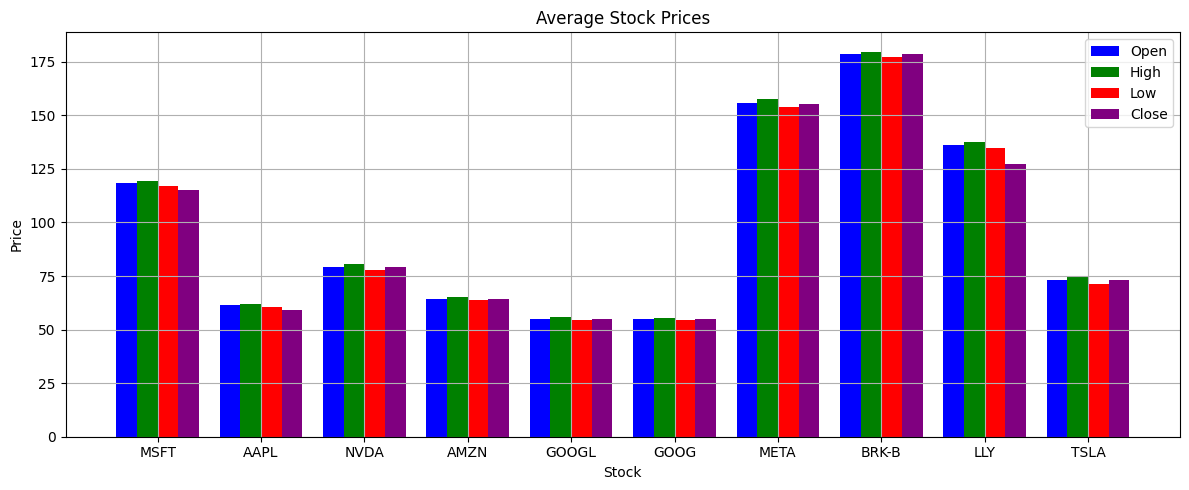

In [36]:
n = len(top_10)
x = np.arange(n)
width = 0.2

# colors for each type of price
colors = {'Open': 'blue', 'High': 'green', 'Low': 'red', 'Close': 'purple'}

plt.figure(figsize=(12, 5))

# For each stock, create a bar for 'Open', 'High', 'Low', and 'Close' prices
for i, stock in enumerate(top_10):
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == stock]
    avg_open = stock_data['Open'].mean()
    avg_high = stock_data['High'].mean()
    avg_low = stock_data['Low'].mean()
    avg_close = stock_data['Adj Close'].mean()

    plt.bar(x[i] - width*1.5, avg_open, width, color=colors['Open'], label='Open' if i == 0 else "")
    plt.bar(x[i] - width/2, avg_high, width, color=colors['High'], label='High' if i == 0 else "")
    plt.bar(x[i] + width/2, avg_low, width, color=colors['Low'], label='Low' if i == 0 else "")
    plt.bar(x[i] + width*1.5, avg_close, width, color=colors['Close'], label='Close' if i == 0 else "")


plt.title('Average Stock Prices')
plt.xlabel("Stock")
plt.ylabel("Price")
plt.xticks(x, top_10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**TOP 10 COMPANIES STOCK PRICES BEFORE TRUMP BAN**

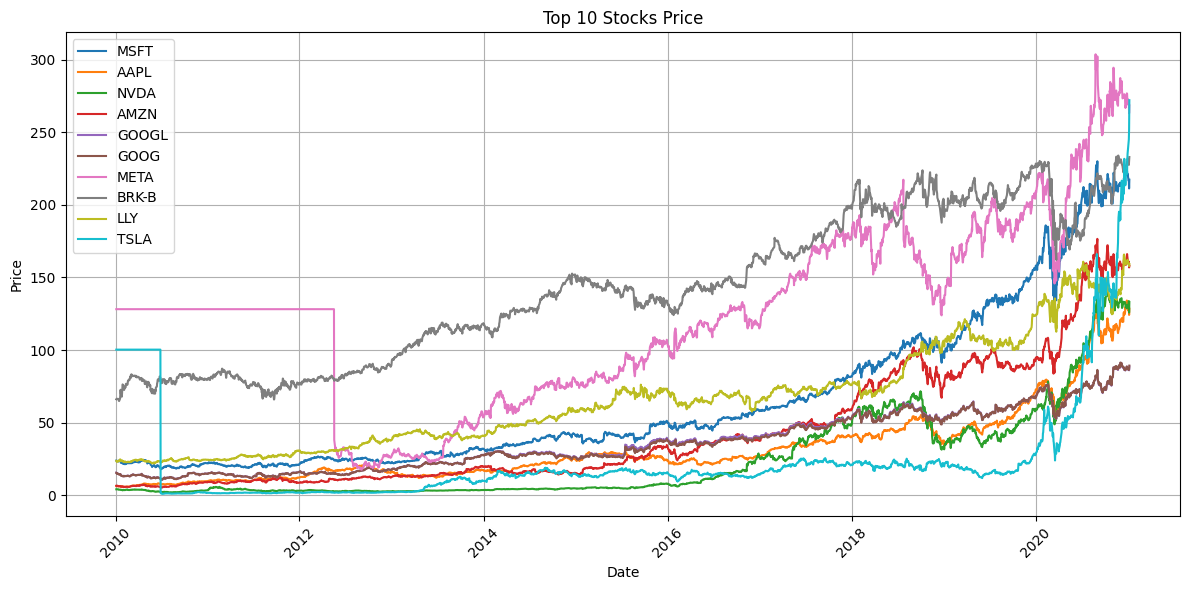

In [27]:
plt.figure(figsize=(12, 6))

for stock in top_10:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == stock]
    # the date should start from 2021-01-08 
    stock_data = stock_data[stock_data['Date'] < '2021-01-08']
    plt.plot(pd.to_datetime(stock_data['Date']), stock_data['Adj Close'], label=stock)  

plt.title('Top 10 Stocks Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**TOP 10 COMPANIES STOCK PRICES AFTER TRUMP BAN**

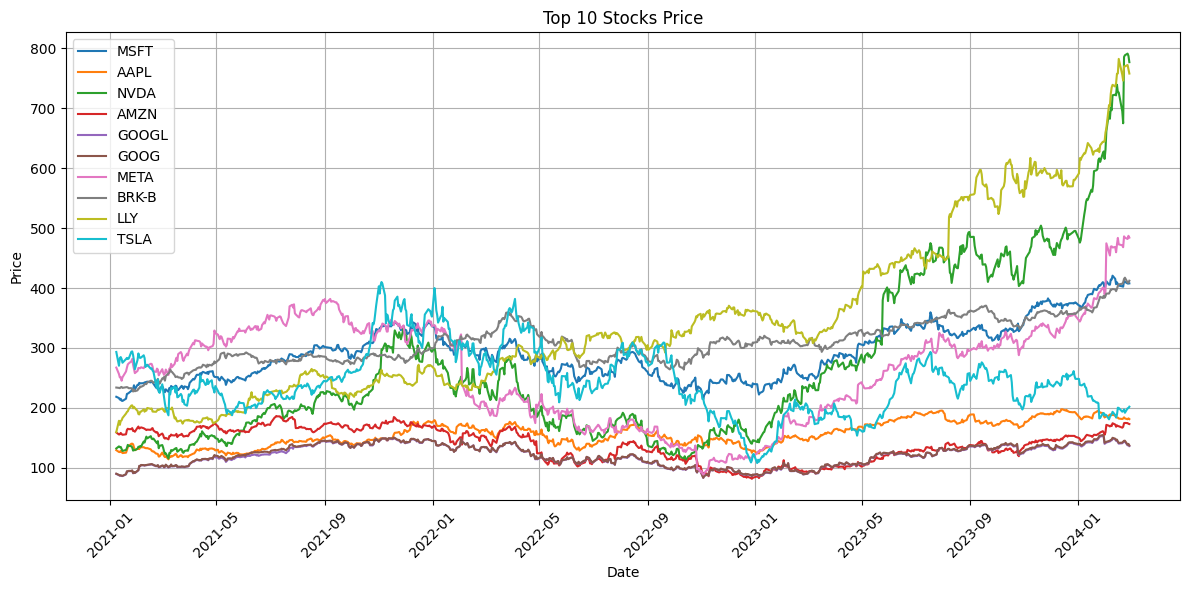

In [14]:
plt.figure(figsize=(12, 6))

for stock in top_10:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == stock]
    # the date should start from 2021-01-08 
    stock_data = stock_data[stock_data['Date'] >= '2021-01-08']
    plt.plot(pd.to_datetime(stock_data['Date']), stock_data['Adj Close'], label=stock)  

plt.title('Top 10 Stocks Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**STOCK PRICES(HIGH, LOW, OPEINING, ADJ CLOSING) OF EACH OF THE TOP 10 COMPANIES**

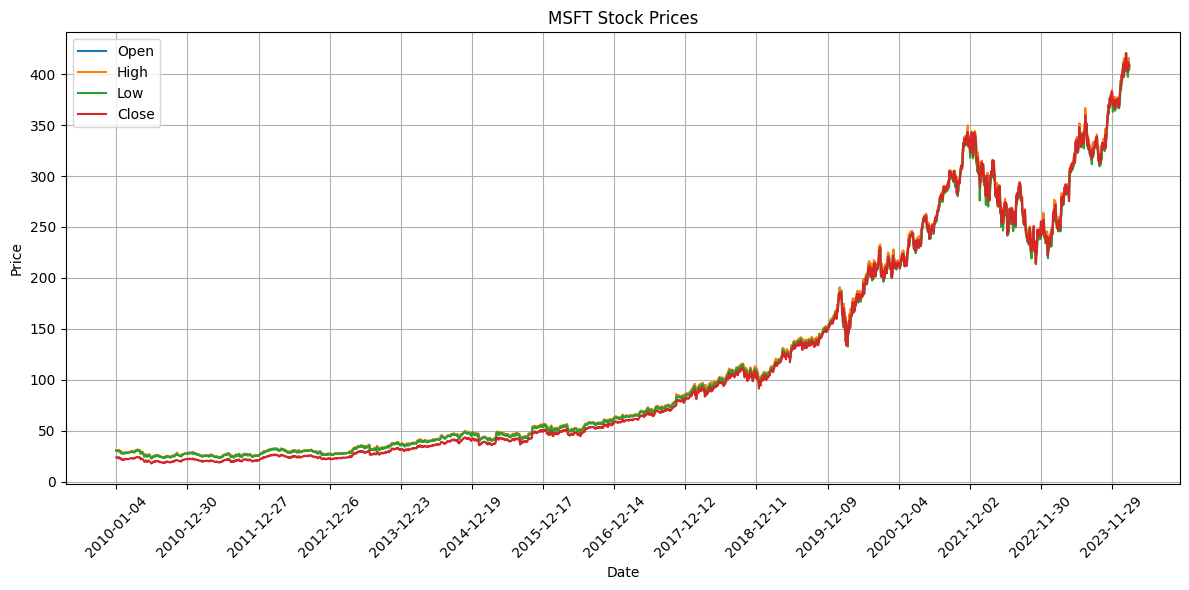

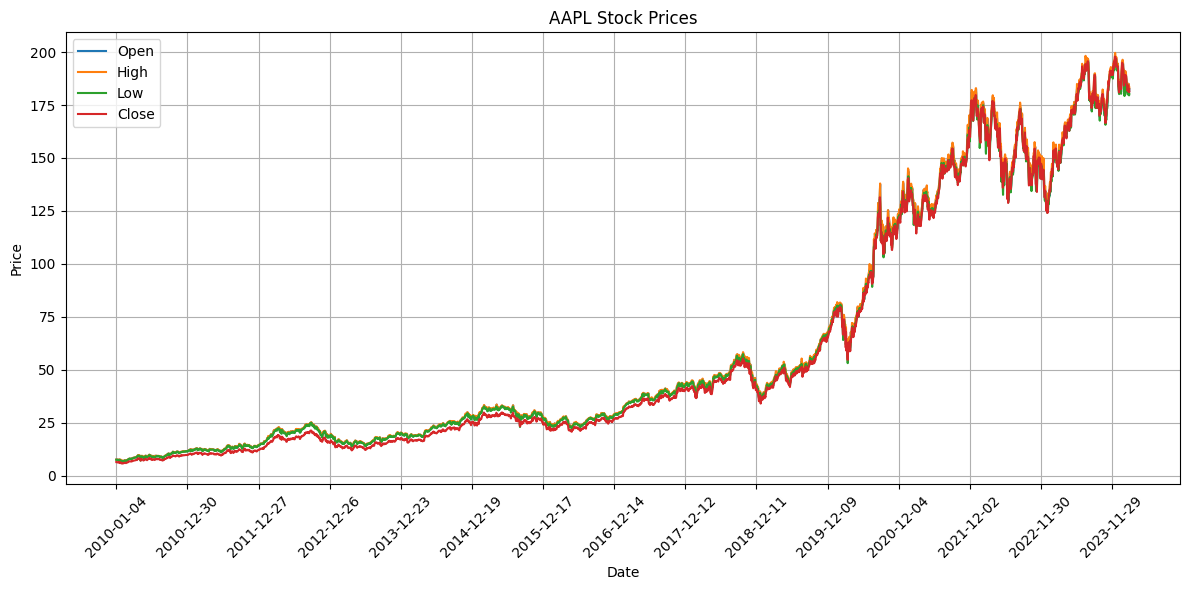

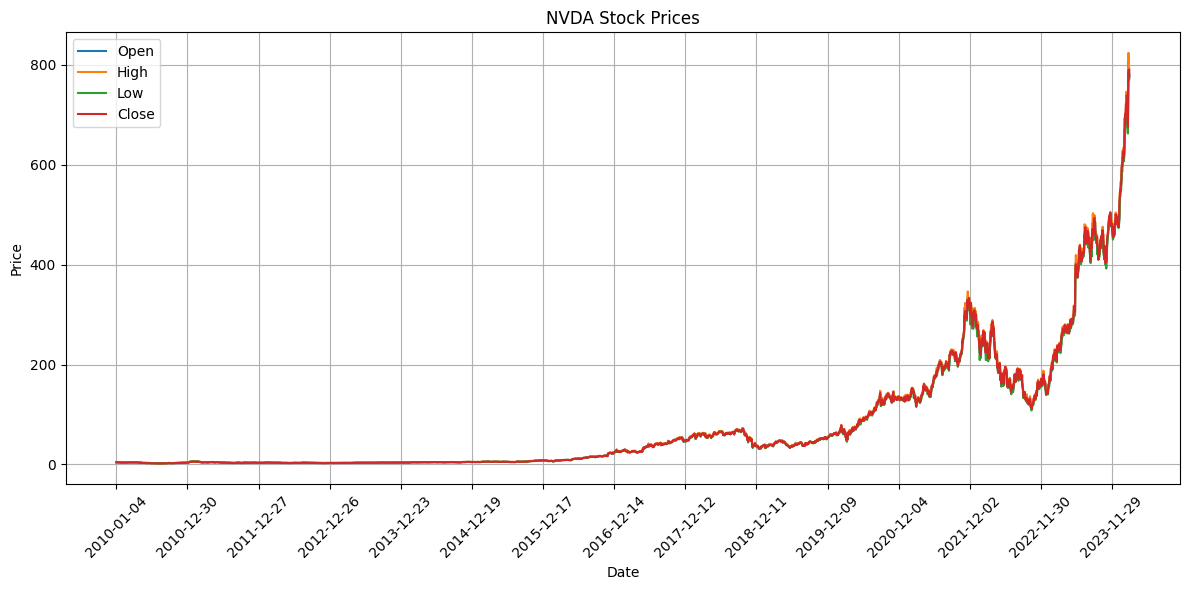

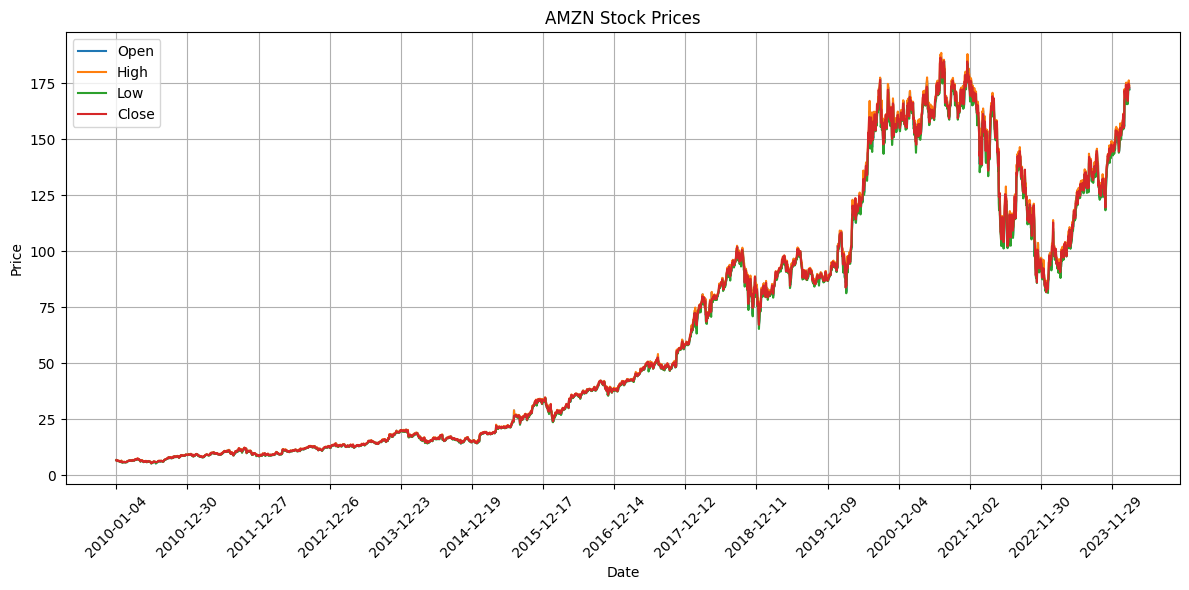

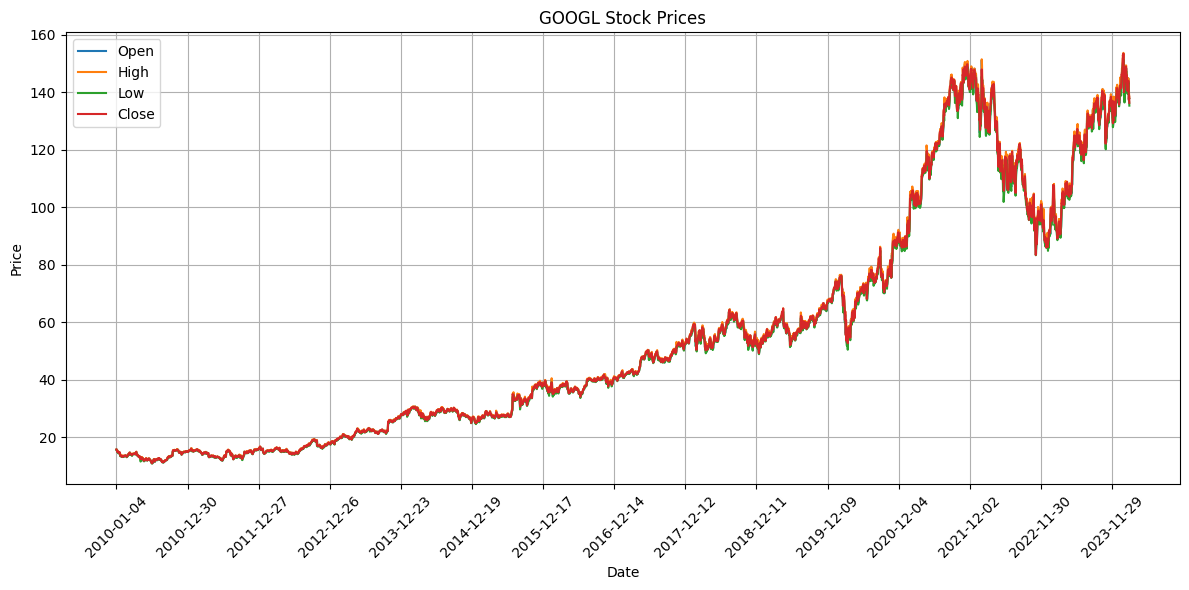

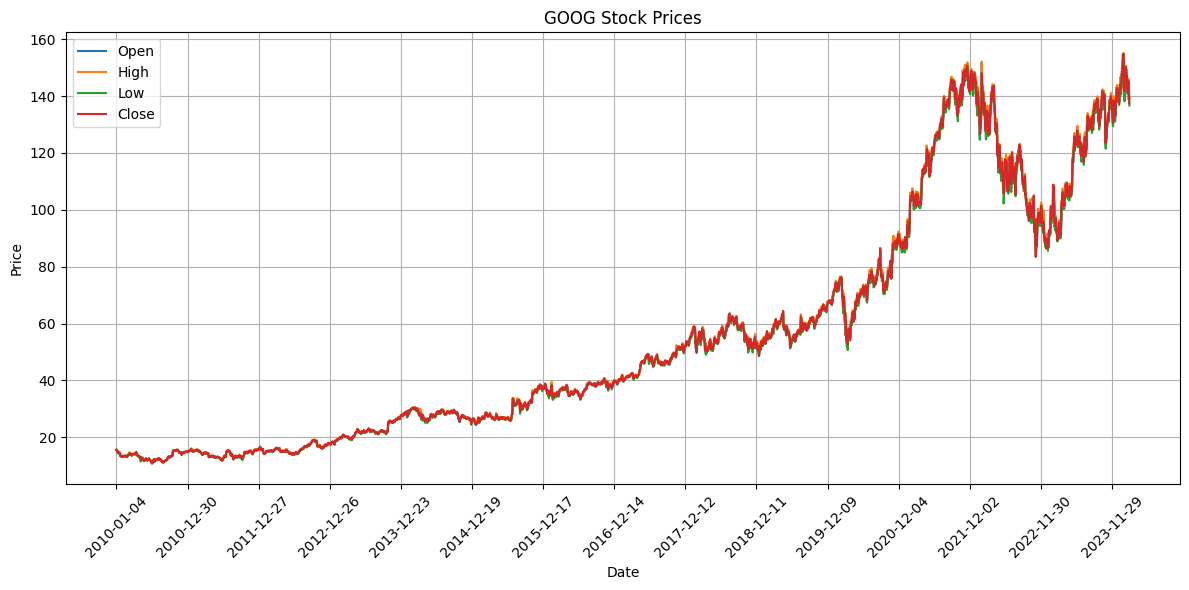

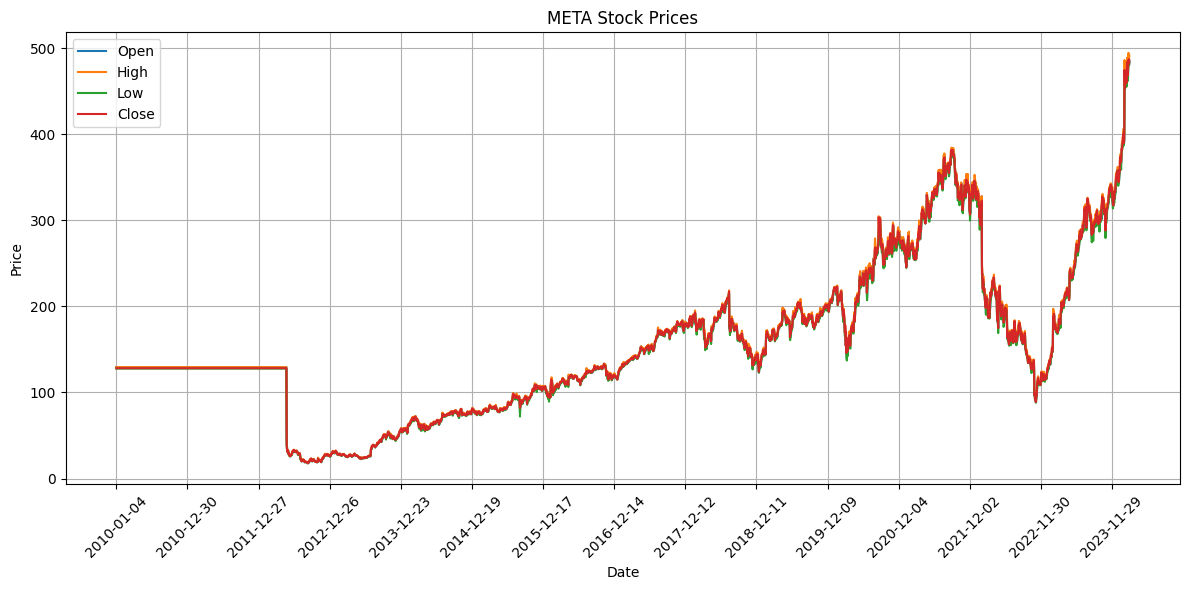

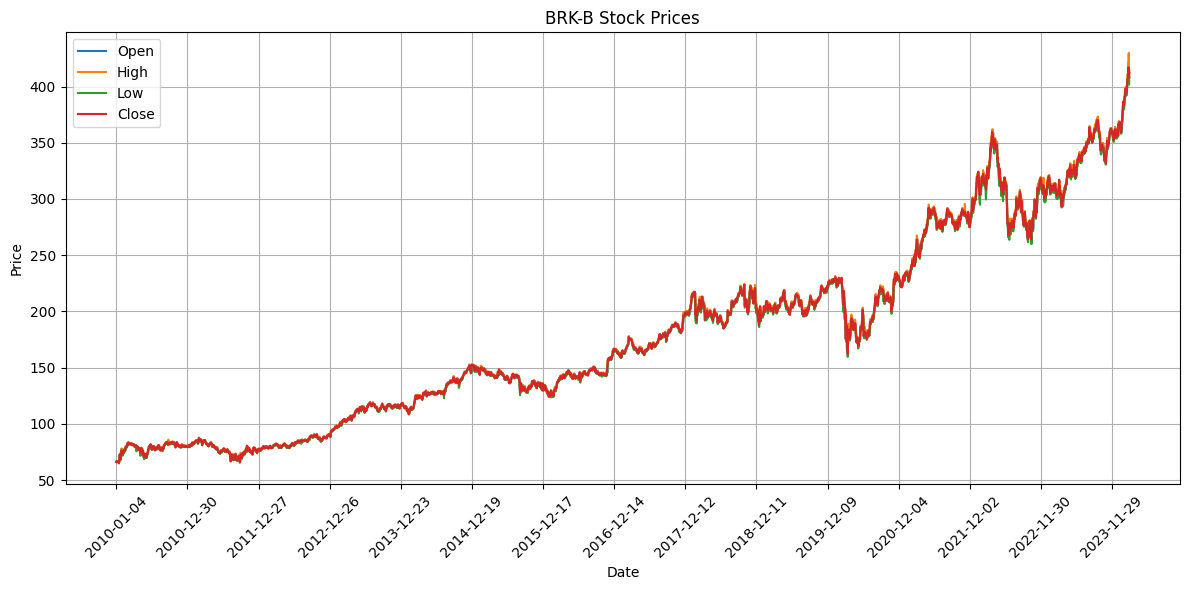

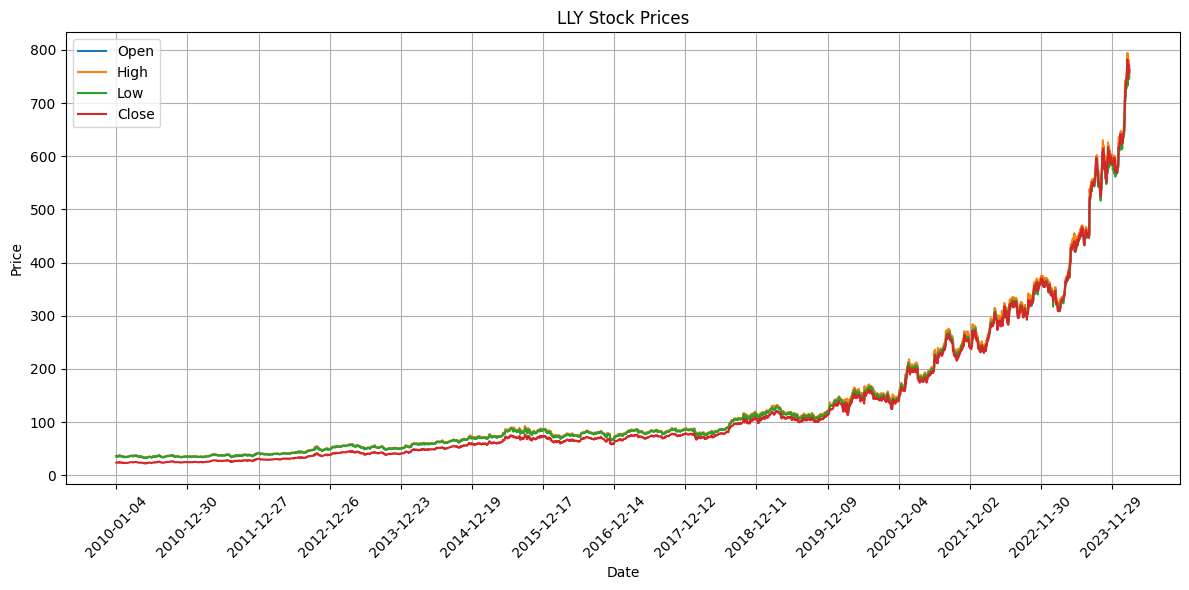

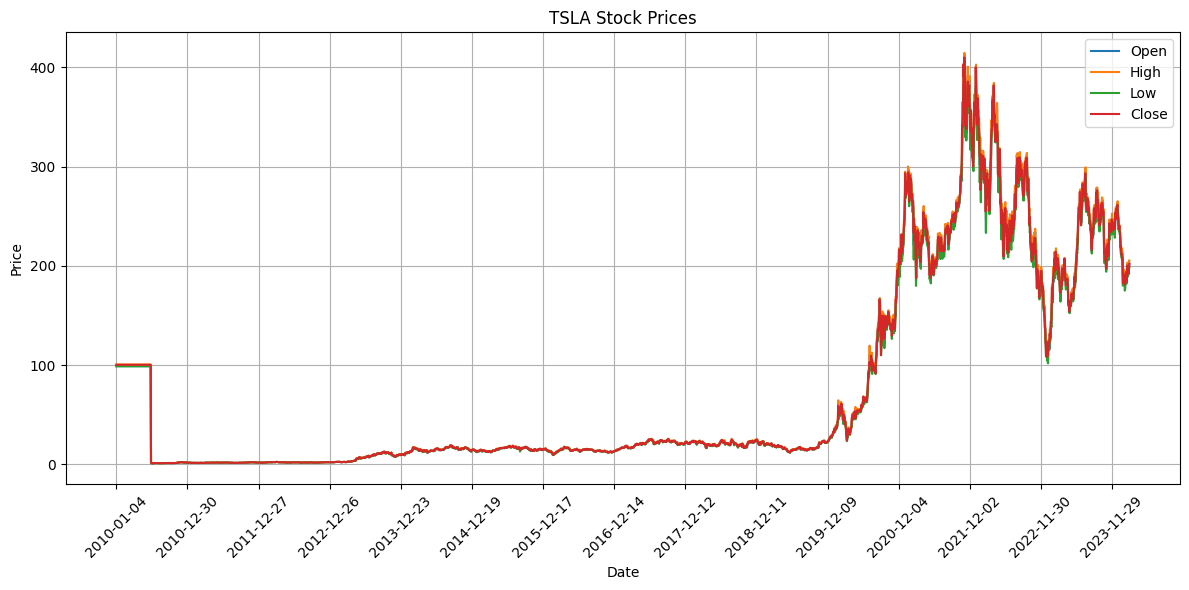

In [7]:
for stock in top_10:
    stock_data = sp500_stocks[sp500_stocks['Symbol'] == stock]
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(stock_data['Date'], stock_data['Open'], label='Open')
    plt.plot(stock_data['Date'], stock_data['High'], label='High')
    plt.plot(stock_data['Date'], stock_data['Low'], label='Low')
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Close')
    
    plt.title(f'{stock} Stock Prices')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(stock_data['Date'][::250],rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**DESCRIBTIVE STATISTICS OF THE STOCK CATEGORIES BASE ON THEIR INDUSTRY**

In [8]:
# unique industries
uniqueInd = stock_comp['Industry'].unique()
print("Total unique industries: ", len(uniqueInd))
# top 10 industries with the most companies
top_10_industries = stock_comp['Industry'].value_counts().nlargest(10)
print(top_10_industries)

for industry in top_10_industries.index:
    industry_stocks = stock_comp[stock_comp['Industry'] == industry]['Symbol']
    industry_data = pd.concat([sp500_stocks[sp500_stocks['Symbol'] == stock] for stock in industry_stocks])
    # A description of the total stock in the industry
    # print(f"Descriptive stats for total stock in {industry} industry:")
    # print(industry_data.describe().to_markdown())

# Merge the stock_comp and sp500_stocks DataFrames on the 'Symbol' column
merged_data = pd.merge(stock_comp, sp500_stocks, on='Symbol')
# Find the maximum 'Adj Close' value for each industry
industry_max_adj_close = merged_data.groupby('Industry')['Adj Close'].max()
industry_rankings = industry_max_adj_close.sort_values(ascending=False)
industry_rankings = industry_rankings.reset_index()
industry_rankings['Rank'] = range(1, len(industry_rankings) + 1)
industry_rankings.set_index('Rank', inplace=True)

# Display the rankings in a markdown table
# print(industry_rankings.head(30).to_markdown())

Total unique industries:  116
Industry
Utilities - Regulated Electric    23
Specialty Industrial Machinery    17
Semiconductors                    14
Software - Application            12
Diagnostics & Research            12
Software - Infrastructure         11
Oil & Gas E&P                     11
Aerospace & Defense               11
Medical Devices                   11
Banks - Regional                  11
Name: count, dtype: int64


**Top 30 industries ranked by the maximum 'Adj Close' value**
|   Rank | Industry                            |   Adj Close |
|-------:|:------------------------------------|------------:|
|      1 | Residential Construction            |    7617.24  |
|      2 | Travel Services                     |    3901.99  |
|      3 | Specialty Retail                    |    3011.62  |
|      4 | Restaurants                         |    2671.72  |
|      5 | Diagnostics & Research              |    1702.53  |
|      6 | Software - Application              |    1323.81  |
|      7 | Semiconductors                      |    1309.13  |
|      8 | Aerospace & Defense                 |    1199.89  |
|      9 | Biotechnology                       |     993.35  |
|     10 | Industrial Distribution             |     974.7   |
|     11 | Semiconductor Equipment & Materials |     944.36  |
|     12 | Asset Management                    |     913.899 |
|     13 | REIT - Specialty                    |     891.87  |
|     14 | Medical Devices                     |     825.77  |
|     15 | Telecom Services                    |     821.01  |
|     16 | Drug Manufacturers - General        |     782.06  |
|     17 | Discount Stores                     |     747.96  |
|     18 | Information Technology Services     |     717.49  |
|     19 | Entertainment                       |     691.69  |
|     20 | Software - Infrastructure           |     688.37  |
|     21 | Rental & Leasing Services           |     686.19  |
|     22 | Financial Data & Stock Exchanges    |     659.688 |
|     23 | Specialty Business Services         |     633.94  |
|     24 | Communication Equipment             |     614.55  |
|     25 | Capital Markets                     |     587.942 |
|     26 | Building Materials                  |     566.1   |
|     27 | Healthcare Plans                    |     557.899 |
|     28 | Specialty Industrial Machinery      |     531.49  |
|     29 | Medical Distribution                |     523.68  |
|     30 | Apparel Retail                      |     511.29  |  

Descriptive stats for total stock in Utilities - Regulated Electric industry:
|       |   Adj Close |      Close |       High |        Low |       Open |          Volume |
|:------|------------:|-----------:|-----------:|-----------:|-----------:|----------------:|
| count | 81926       | 81926      | 81926      | 81926      | 81926      | 81926           |
| mean  |    44.3965  |    52.9287 |    53.3651 |    52.4536 |    52.9203 |     3.32597e+06 |
| std   |    23.6326  |    23.6399 |    23.847  |    23.42   |    23.6412 |     3.98583e+06 |
| min   |     3.79788 |     3.8    |     4.72   |     3.55   |     3.8    |     0           |
| 25%   |    25.111   |    33.05   |    33.3    |    32.74   |    33.02   |     1.41772e+06 |
| 50%   |    39.6776  |    50.1    |    50.5    |    49.6598 |    50.07   |     2.3222e+06  |
| 75%   |    60.6331  |    69.89   |    70.47   |    69.23   |    69.88   |     3.91506e+06 |
| max   |   131.333   |   139.12   |   140.23   |   138.43   |   139.03   |     3.53649e+08 |

Descriptive stats for total stock in Specialty Industrial Machinery industry:
|       |   Adj Close |      Close |        High |         Low |        Open |           Volume |
|:------|------------:|-----------:|------------:|------------:|------------:|-----------------:|
| count | 55657       | 55657      | 55657       | 55657       | 55657       |  55657           |
| mean  |    91.6985  |    98.8753 |    99.8992  |    97.7977  |    98.8637  |      1.99972e+06 |
| std   |    69.4477  |    69.9268 |    70.7007  |    69.1249  |    69.9344  |      2.81704e+06 |
| min   |     5.61098 |     6.91   |     7.06667 |     6.84833 |     6.91333 |   3600           |
| 25%   |    42.9484  |    49.02   |    49.52    |    48.46    |    48.99    | 690200           |
| 50%   |    68.966   |    76.3651 |    77.0432  |    75.6381  |    76.36    |      1.1898e+06  |
| 75%   |   123.495   |   134.02   |   135.46    |   132.6     |   134       |      2.2097e+06  |
| max   |   531.49    |   531.49   |   536.57    |   530       |   532.9     |      7.18298e+07 |

Descriptive stats for total stock in Semiconductors industry:
|       |   Adj Close |      Close |       High |        Low |       Open |          Volume |
|:------|------------:|-----------:|-----------:|-----------:|-----------:|----------------:|
| count |  48461      | 48461      | 48461      | 48461      | 48461      | 48461           |
| mean  |     79.677  |    85.0794 |    86.2344 |    83.8322 |    85.0474 |     1.50703e+07 |
| std   |    109.228  |   111.815  |   113.319  |   110.112  |   111.698  |     2.28169e+07 |
| min   |      1.62   |     1.62   |     1.69   |     1.61   |     1.62   |     0           |
| 25%   |     20.2119 |    23.77   |    24.08   |    23.5    |    23.8    |     2.2266e+06  |
| 50%   |     47.2642 |    53.35   |    54.05   |    52.645  |    53.33   |     5.1862e+06  |
| 75%   |     95.3691 |   101.63   |   102.95   |   100.14   |   101.63   |     1.92684e+07 |
| max   |   1309.13   |  1309.13   |  1319.62   |  1301.46   |  1310      |     3.69293e+08 |

Descriptive stats for total stock in Software - Application industry:
|       |   Adj Close |     Close |      High |        Low |      Open |           Volume |
|:------|------------:|----------:|----------:|-----------:|----------:|-----------------:|
| count |  38686      | 38686     | 38686     | 38686      | 38686     |  38686           |
| mean  |    161.302  |   162.016 |   163.998 |   159.874  |   161.945 |      2.41548e+06 |
| std   |    157.147  |   157.11  |   159.059 |   155.03   |   157.041 |      5.84241e+06 |
| min   |      5.45   |     5.45  |     5.58  |     5.36   |     5.47  |  13300           |
| 25%   |     45.3572 |    45.99  |    46.6   |    45.3725 |    45.92  | 358125           |
| 50%   |     99.2504 |   101.875 |   102.795 |   100.673  |   101.705 | 912250           |
| 75%   |    229.535  |   230.97  |   233.38  |   227.84   |   230.77  |      2.10125e+06 |
| max   |   1323.81   |  1323.81  |  1336.39  |  1317.42   |  1333.93  |      3.64232e+08 |

Descriptive stats for total stock in Diagnostics & Research industry:
|       |   Adj Close |     Close |      High |       Low |       Open |           Volume |
|:------|------------:|----------:|----------:|----------:|-----------:|-----------------:|
| count |  41902      | 41902     | 41902     | 41902     | 41902      |  41902           |
| mean  |    177.996  |   179.403 |   181.394 |   177.259 |   179.345  |      1.36986e+06 |
| std   |    216.335  |   215.824 |   218.379 |   213.099 |   215.781  |      1.78876e+06 |
| min   |     17.3667 |    17.49  |    17.72  |    17.45  |    17.5    |  33300           |
| 25%   |     57.9925 |    61.43  |    61.95  |    60.79  |    61.3525 | 475500           |
| 50%   |    113.152  |   114.609 |   115.935 |   113.34  |   114.685  | 880042           |
| 75%   |    208.817  |   209.183 |   211.61  |   206.612 |   209.024  |      1.62698e+06 |
| max   |   1702.53   |  1702.53  |  1714.75  |  1696.9   |  1706.4    |      1.03834e+08 |

Descriptive stats for total stock in Software - Infrastructure industry:
|       |   Adj Close |      Close |      High |       Low |       Open |           Volume |
|:------|------------:|-----------:|----------:|----------:|-----------:|-----------------:|
| count |   38300     | 38300      | 38300     | 38300     | 38300      |  38300           |
| mean  |     100.416 |   101.863  |   103.01  |   100.638 |   101.83   |      7.83343e+06 |
| std   |     105.58  |   104.582  |   105.808 |   103.277 |   104.57   |      1.33059e+07 |
| min   |       1.5   |     1.5    |     1.521 |     1.472 |     1.502  |      0           |
| 25%   |      28.42  |    30.7275 |    31.02  |    30.36  |    30.7075 | 952975           |
| 50%   |      60.96  |    61.36   |    62.115 |    60.63  |    61.27   |      2.8752e+06  |
| 75%   |     138.89  |   139.1    |   140.823 |   137.59  |   139.24   |      7.9797e+06  |
| max   |     688.37  |   688.37   |   699.54  |   678.91  |   696.28   |      3.19318e+08 |

Descriptive stats for total stock in Oil & Gas E&P industry:
|       |   Adj Close |      Close |       High |        Low |       Open |          Volume |
|:------|------------:|-----------:|-----------:|-----------:|-----------:|----------------:|
| count | 38481       | 38481      | 38481      | 38481      | 38481      | 38481           |
| mean  |    53.5316  |    63.859  |    64.7727 |    62.9289 |    63.875  |     6.15169e+06 |
| std   |    38.3568  |    44.2761 |    44.8411 |    43.6978 |    44.2922 |     6.56681e+06 |
| min   |     2.95792 |     3.12   |     3.29   |     3.02   |     3.22   | 12800           |
| 25%   |    26.1531  |    30.44   |    30.92   |    29.9075 |    30.4028 |     2.6465e+06  |
| 50%   |    44.4579  |    55.07   |    55.8    |    54.34   |    55.06   |     4.42059e+06 |
| 75%   |    67.0746  |    84.17   |    85.1525 |    83.1693 |    84.2    |     7.3827e+06  |
| max   |   252.18    |   285.28   |   288.46   |   282.31   |   286.49   |     2.73997e+08 |

Descriptive stats for total stock in Aerospace & Defense industry:
|       |   Adj Close |     Close |       High |        Low |       Open |           Volume |
|:------|------------:|----------:|-----------:|-----------:|-----------:|-----------------:|
| count |  37156      | 37156     | 37156      | 37156      | 37156      |  37156           |
| mean  |    139.644  |   154.677 |   156.26   |   153.031  |   154.653  |      2.41228e+06 |
| std   |    136.41   |   142.588 |   144.037  |   141.06   |   142.545  |      3.84874e+06 |
| min   |      3.58   |     3.58  |     3.65   |     3.52   |     3.58   |      0           |
| 25%   |     46.6213 |    55.975 |    56.5245 |    55.2761 |    55.8775 | 620150           |
| 50%   |     88.2032 |   102.895 |   103.93   |   101.8    |   102.795  |      1.24715e+06 |
| 75%   |    194.055  |   212.672 |   214.75   |   210.502  |   212.622  |      2.84022e+06 |
| max   |   1199.89   |  1199.89  |  1207.58   |  1192.78   |  1203.33   |      1.03213e+08 |

Descriptive stats for total stock in Medical Devices industry:
|       |   Adj Close |      Close |       High |        Low |       Open |           Volume |
|:------|------------:|-----------:|-----------:|-----------:|-----------:|-----------------:|
| count |  39182      | 39182      | 39182      | 39182      | 39182      |  39182           |
| mean  |    101.677  |   104.669  |   105.945  |   103.326  |   104.663  |      3.55484e+06 |
| std   |    113.165  |   112.758  |   114.381  |   111.112  |   112.817  |      5.33064e+06 |
| min   |      1.7275 |     1.7275 |     1.75   |     1.6875 |     1.7125 |      0           |
| 25%   |     30.3394 |    34.37   |    34.78   |    33.953  |    34.35   | 557100           |
| 50%   |     66.5308 |    73.2217 |    73.9507 |    72.4067 |    73.24   |      1.63745e+06 |
| 75%   |    119.386  |   122.23   |   123.27   |   120.87   |   122.149  |      4.80898e+06 |
| max   |    825.77   |   825.77   |   832.7    |   817.17   |   822.73   |      2.43874e+08 |

Descriptive stats for total stock in Banks - Regional industry:
|       |   Adj Close |      Close |       High |        Low |       Open |           Volume |
|:------|------------:|-----------:|-----------:|-----------:|-----------:|-----------------:|
| count | 37993       | 37993      | 37993      | 37993      | 37993      |  37993           |
| mean  |    39.3076  |    46.3389 |    46.8599 |    45.8027 |    46.3411 |      6.99597e+06 |
| std   |    38.0481  |    41.914  |    42.3392 |    41.4811 |    41.9177 |      6.95425e+06 |
| min   |     2.17158 |     3.02   |     3.2    |     2.82   |     2.98   | 125900           |
| 25%   |    14.0101  |    16.98   |    17.21   |    16.72   |    16.98   |      2.2453e+06  |
| 50%   |    26.8998  |    33.24   |    33.67   |    32.83   |    33.22   |      5.1463e+06  |
| 75%   |    46.4722  |    54.69   |    55.26   |    54.16   |    54.7    |      9.5537e+06  |
| max   |   207.016   |   226.45   |   228.14   |   225.7    |   226.38   |      1.61746e+08 |

### TRUMP LEGACY DATA CLEANING

In [6]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords

# Load the dataset
dataframe = pd.read_csv('Trumps Legacy.csv')

# Remove URLs
dataframe['text'] = dataframe['text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Remove special characters and numbers
dataframe['text'] = dataframe['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# Convert to lowercase
dataframe['text'] = dataframe['text'].apply(lambda x: x.lower())

# Remove stopwords
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\boyea/nltk_data'
    - 'c:\\Users\\boyea\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\boyea\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\boyea\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\boyea\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
